In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("dataset_website.csv")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull()

In [ ]:
x = df.iloc[:,1:31].values
y = df.iloc[:,31:32].values

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
print(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_train.shape

(8844, 30)

In [29]:
x_test.shape

(2211, 30)

In [30]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [31]:
log.fit(x_train,y_train)

c:\users\nidhi\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
y_pred_lr = log.predict(x_test)
y_pred_lr

array([-1, -1,  1, ..., -1, -1,  1], dtype=int64)

In [33]:
y_test

array([[-1],
       [-1],
       [-1],
       ...,
       [ 1],
       [ 1],
       [ 1]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred_lr)

0.9167797376752601

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test,y_pred_lr)
cm

array([[ 905,  109],
       [  75, 1122]], dtype=int64)

In [38]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred_lr)
roc_curve = metrics.auc(fpr,tpr)

In [39]:
fpr

array([0.        , 0.10749507, 1.        ])

In [40]:
tpr

array([0.        , 0.93734336, 1.        ])

In [41]:
import matplotlib.pyplot as plt

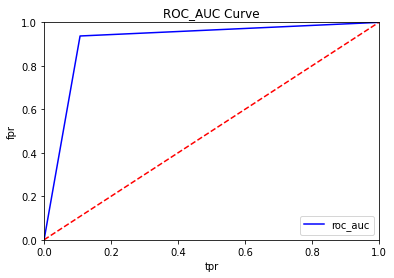

In [42]:
plt.title("ROC_AUC Curve")
plt.plot(fpr,tpr,'b',label='roc_auc')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc="lower right")

In [44]:
import pickle
pickle.dump(log,open('Phishing_Website.pkl','wb'))